**-MAPPA DEI PUB ".JSON" DATASET**

In [1]:
#connessione al dataset Mappa_pub.json
#encoding = 'latin1' per la lettura .json

import pandas as pd
import json
file_path = ("../Jupyter/MAPPA/Mappa_pub.json")
with open(file_path, 'r', encoding = 'latin1') as f:
    json_data = f.read()

df = pd.read_json(json_data)
df.head(5)         

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.575830
1,ALTRO,ALTRO,ALTRO,Lenny's Pub,2011,2011-07-29T17:22:56Z,1375887295,12.418681,46.747584
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
3,ALTRO,ALTRO,ALTRO,Snop?e,2010,2010-09-22T08:32:52Z,921157802,13.640939,45.954607
4,Ala di Stura,TORINO,Piemonte,,2012,2012-05-21T14:28:45Z,1760949034,7.307306,45.313150


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ccomune                           2497 non-null   object 
 1   cprovincia                        2497 non-null   object 
 2   cregione                          2497 non-null   object 
 3   cnome                             2497 non-null   object 
 4   canno_inserimento                 2497 non-null   int64  
 5   cdata_e_ora_inserimento           2497 non-null   object 
 6   cidentificatore_in_openstreetmap  2497 non-null   int64  
 7   clongitudine                      2497 non-null   float64
 8   clatitudine                       2497 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 175.7+ KB


In [3]:
print(df.head(1),"\n","\n")
print(df.tail(1),"\n","\n")
print(df.sample(1))

  ccomune cprovincia cregione cnome  canno_inserimento  \
0   ALTRO      ALTRO    ALTRO                     2011   

  cdata_e_ora_inserimento  cidentificatore_in_openstreetmap  clongitudine  \
0    2011-06-25T23:17:43Z                        1339088150     13.733257   

   clatitudine  
0     45.57583   
 

         ccomune             cprovincia cregione         cnome  \
2496  Trani (BT)  BARLETTA ANDRIA TRANI   Puglia  Well's Fargo   

      canno_inserimento cdata_e_ora_inserimento  \
2496               2009    2009-08-10T12:44:03Z   

      cidentificatore_in_openstreetmap  clongitudine  clatitudine  
2496                         387223648     16.436765    41.267264   
 

        ccomune cprovincia   cregione              cnome  canno_inserimento  \
771  Monzambano    MANTOVA  Lombardia  Taverna dal Conte               2014   

    cdata_e_ora_inserimento  cidentificatore_in_openstreetmap  clongitudine  \
771    2014-02-13T21:53:12Z                        2670731556     10.696725 

In [4]:
df["canno_inserimento"]

0       2011
1       2011
2       2015
3       2010
4       2012
        ... 
2492    2010
2493    2014
2494    2014
2495    2009
2496    2009
Name: canno_inserimento, Length: 2497, dtype: int64

In [5]:
#n° attività tra long 9-10 e lat 45-46
long9_10 = (df['clongitudine']<10) & (df['clongitudine']>9)
lat45_46 =(df['clatitudine']<46) & (df['clatitudine']>45)
target = df.loc[(long9_10) & (lat45_46)]
target.cnome.count()

303

In [6]:
#attività in provincia di vicenza
prov_vicenza = df.cprovincia == "VICENZA"
df.cprovincia.groupby(prov_vicenza).count()


cprovincia
False    2424
True       73
Name: cprovincia, dtype: int64

In [7]:
f_enoteca= df.cnome.str.contains("Enoteca")
df.loc[f_enoteca]

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
64,Torino,TORINO,Piemonte,"Enoteca con Cucina""""Tirolin""""",2012,2012-01-24T14:30:04Z,1603586163,7.713993,45.065174
493,Milano,MILANO,Lombardia,Concordia Enoteca,2014,2014-04-01T11:15:38Z,2758108717,9.171033,45.450819
1000,Malo,VICENZA,Veneto,Enoteca Umberto,2013,2013-04-15T08:41:22Z,1659350138,11.418507,45.653453
1472,Ferrara,FERRARA,Emilia-Romagna,"Enoteca """"Al Brindisi""""",2015,2015-03-31T17:33:38Z,1249699754,11.620326,44.835890
1473,Ferrara,FERRARA,Emilia-Romagna,"Enoteca """"da Massimo""""",2015,2015-03-31T17:33:38Z,1249701207,11.619559,44.834824
1704,CASCIANA TERME LARI,PISA,Toscana,Enoteca Il Violino Rosso,2015,2015-08-20T13:12:56Z,3706561154,10.591535,43.566210


In [8]:
#attività in lazio e abruzzo
reg_abruzzo = df.cregione == "Abruzzo"
reg_lazio = df.cregione == "Lazio"
f_reg= reg_abruzzo | reg_lazio
df.loc[f_reg].cnome.count()


237

**-IRIS ".CSV" DATASET**

In [9]:
#connessione ad iris.csv dataset
import pandas as pd
file= "iris.csv"
dataset_path="../Jupyter/dati py epicode/archive/beginner_datasets/"
iris= pd.read_csv(filepath_or_buffer = (dataset_path+file))

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#media totale lunghezza petali
print("lunghezza media dei petali:",iris.petal_length.mean())

lunghezza media dei petali: 3.758666666666666


In [12]:
#media lunghezza petali per specie
mlp=iris.groupby("species").mean("petal_length")
mlp.petal_length

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [13]:
#media,minimo,massimo larghezza sepali per specie
ir=iris.groupby("species")["sepal_width"]
dati_sepali =ir.agg(["mean","min","max"])
dati_sepali

,mean,min,max
species,,,
Iris-setosa,3.418,2.3,4.4
Iris-versicolor,2.770,2.0,3.4
Iris-virginica,2.974,2.2,3.8


**-WINE "CSV." DATASET**

In [14]:
#connessione dataset wine.csv
file= "wine.csv"
dataset_path="../Jupyter/dati py epicode/archive/beginner_datasets/"
wine= pd.read_csv(filepath_or_buffer = (dataset_path+file))
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [16]:
#media gradazione alcolica totale e per qualità
print("media totale:",wine.alcohol.mean(),"\n")
print("media per qualità:")
wine.groupby("quality").mean("alchhol").alcohol


media totale: 10.491800831149453 

media per qualità:


quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64

In [17]:
#media lcolica pe tipologia
wine.groupby("type").mean("alcohol").alcohol

type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64

In [18]:
#view su media pH totale, per qualità e tipologia
print("media totale pH:","\n",wine.pH.mean(),"\n")
print("media pH per per qualità:","\n",wine.groupby("quality").mean("pH").pH,"\n")
print("media pH per tipologia:","\n",wine.groupby("type").mean("pH").pH)

media totale pH: 
 3.2185008465445586 

media pH per per qualità: 
 quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64 

media pH per tipologia: 
 type
red      3.311113
white    3.188267
Name: pH, dtype: float64


In [19]:
#view su medie solfati
print("media totale solfati:","\n",wine.sulphates.mean(),"\n")
print("media solfati per per qualità:","\n",wine.groupby("quality").mean("sulphates").sulphates,"\n")
print("media solfati per tipologia:","\n",wine.groupby("type").mean("sulphates").sulphates)

media totale solfati: 
 0.5312682776666154 

media solfati per per qualità: 
 quality
3    0.506333
4    0.505648
5    0.526403
6    0.532549
7    0.547025
8    0.512487
9    0.466000
Name: sulphates, dtype: float64 

media solfati per tipologia: 
 type
red      0.658149
white    0.489847
Name: sulphates, dtype: float64


**-BOSTON "CSV." DATASET**

In [20]:
file= "boston.csv"
dataset_path="../Jupyter/dati py epicode/archive/beginner_datasets/"
boston= pd.read_csv(filepath_or_buffer = (dataset_path+file))
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
#overview
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [22]:
#confronto costo mdio case sul fiume e non
bos_riv=boston.groupby("chas")
bos_riv.medv.describe()

,count,mean,std,min,25%,50%,75%,max
chas,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


<Axes: xlabel='crim'>

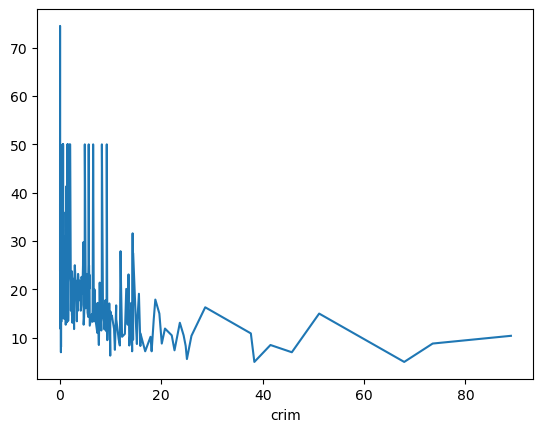

In [23]:
#valore delle case distribuito sul tasso di criminaltà

crim_value=boston.groupby("crim").sum("medv").medv
crim_value.plot()

<Axes: xlabel='ptratio'>

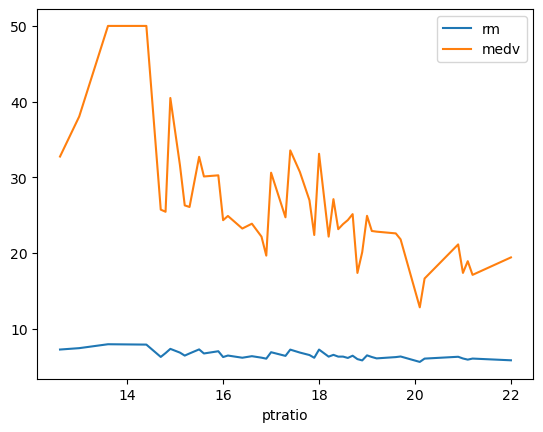

In [24]:
#media num.stanze e valore case in rapporto agli alunni/insegnati per città
alins =boston.groupby(["ptratio"])[["rm","medv"]].mean()
alins.plot()


In [25]:
#età abitazioni, numero stanze e tasse pagate in relazione alla distanza dall'autostrada
bos_rad=boston.groupby("rad")
print("age:","\n",bos_rad.age.mean(),"\n")
print("rm:","\n",bos_rad.rm.mean(),"\n")
print("tax:","\n",bos_rad.tax.mean(),"\n")

age: 
 rad
1     45.025000
2     64.770833
3     49.310526
4     60.841818
5     69.223478
6     60.142308
7     40.141176
8     67.350000
24    89.805303
Name: age, dtype: float64 

rm: 
 rad
1     6.555850
2     6.649958
3     6.473026
4     6.133118
5     6.393157
6     6.104731
7     6.647765
8     6.950792
24    6.022152
Name: rm, dtype: float64 

tax: 
 rad
1     291.450000
2     260.666667
3     246.078947
4     335.981818
5     331.843478
6     372.884615
7     304.411765
8     301.250000
24    666.000000
Name: tax, dtype: float64 



**DataFrame**

In [26]:
#creazione di due DataFrame
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105],
                             'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
                             'department_id': [1, 2, 1, 2, 3] })

departments_df = pd.DataFrame({ 'department_id': [1, 2, 3],
                               'department_name': ['HR', 'IT', 'Finance'],
                               'location': ['New York','San Francisco', 'Chicago'] })

In [27]:
#unione dei due df tramite .merge()
employees_df.merge(departments_df,on="department_id")

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,103,Charlie,1,HR,New York
2,102,Bob,2,IT,San Francisco
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


In [28]:
#set department_id come indice per entrambi i df
employees_df.set_index("department_id", inplace=True)


In [29]:
employees_df

,employee_id,name
department_id,,
1,101,Alice
2,102,Bob
1,103,Charlie
2,104,David
3,105,Emma


In [30]:

departments_df.set_index("department_id", inplace=True)

In [31]:
departments_df

,department_name,location
department_id,,
1,HR,New York
2,IT,San Francisco
3,Finance,Chicago


In [32]:
#unione dei df tramite .join()
departments_df.join(employees_df)

,department_name,location,employee_id,name
department_id,,,,
1,HR,New York,101,Alice
1,HR,New York,103,Charlie
2,IT,San Francisco,102,Bob
2,IT,San Francisco,104,David
3,Finance,Chicago,105,Emma


**AdventureWorksDW database**

In [33]:
 #connsessione al Database
import pymysql                                 
import sqlalchemy
import dotenv
import os
import pandas as pd

from sqlalchemy import create_engine, text

dotenv.load_dotenv(dotenv_path="../Jupyter/.env",override=True)

username = os.getenv('username')
password = os.getenv('password')
host = os.getenv('host')
dbname = os.getenv('dbname')

conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname

db_engine =  sqlalchemy.create_engine(conn_string)

query = """SELECT *
           FROM dimemployee"""

d_emp = pd.read_sql(sqlalchemy.text(query), db_engine.connect())
d_emp.columns

Index(['EmployeeKey', 'ParentEmployeeKey', 'EmployeeNationalIDAlternateKey',
       'ParentEmployeeNationalIDAlternateKey', 'FirstName', 'LastName',
       'MiddleName', 'NameStyle', 'Title', 'HireDate', 'BirthDate', 'LoginID',
       'EmailAddress', 'Phone', 'MaritalStatus', 'EmergencyContactName',
       'EmergencyContactPhone', 'SalariedFlag', 'Gender', 'PayFrequency',
       'BaseRate', 'VacationHours', 'SickLeaveHours', 'CurrentFlag',
       'SalesPersonFlag', 'DepartmentName', 'EmployeePhoto', 'Position'],
      dtype='object')

In [34]:
query = """SELECT *
           FROM dimemployeesalesterritory"""

d_est = pd.read_sql(sqlalchemy.text(query), db_engine.connect())
d_est.columns

Index(['EmployeeKey', 'SalesTerritoryKey'], dtype='object')

In [35]:
d_emp.set_index("EmployeeKey",inplace=True)
d_emp.join(d_est)

,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,BirthDate,...,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,EmployeeKey,SalesTerritoryKey
EmployeeKey,,,,,,,,,,,,,,,,,,,,,
1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,1981-11-12,...,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,277.0,1.0
2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,1986-12-01,...,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,286.0,1.0
3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,1974-06-12,...,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,289.0,1.0
4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,1974-07-23,...,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,293.0,1.0
5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,1974-07-23,...,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,272.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,1975-04-30,...,23.0769,34,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,NaN,NaN
293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,1977-08-05,...,23.0769,39,39,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,NaN,NaN
294,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,1974-08-11,...,48.1010,20,30,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,NaN,NaN


In [36]:
#verifica delle dimensioni tabella
df_r=d_emp.join(d_est)
print("righe e colonne df risultante:",df_r.shape)
print("righe e colonne d_emp:",d_emp.shape)
print("righe e colonne d_est:",d_est.shape)

righe e colonne df risultante: (296, 29)
righe e colonne d_emp: (296, 27)
righe e colonne d_est: (39, 2)


In [37]:
#importo DataFrame dimsalesterritory
query = """SELECT *
           FROM dimsalesterritory"""

dim = pd.read_sql(sqlalchemy.text(query), db_engine.connect())
dim.columns

Index(['SalesTerritoryKey', 'SalesTerritoryAlternateKey',
       'SalesTerritoryRegion', 'SalesTerritoryCountry', 'SalesTerritoryGroup',
       'SalesTerritoryImage'],
      dtype='object')

In [38]:
df_r.set_index('SalesTerritoryKey',inplace=True)
dim.set_index('SalesTerritoryKey',inplace=True)
res = df_r.join(dim)


In [42]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 296 entries, 1.0 to nan
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ParentEmployeeKey                     295 non-null    float64
 1   EmployeeNationalIDAlternateKey        296 non-null    int64  
 2   ParentEmployeeNationalIDAlternateKey  295 non-null    float64
 3   FirstName                             296 non-null    object 
 4   LastName                              296 non-null    object 
 5   MiddleName                            283 non-null    object 
 6   NameStyle                             296 non-null    int64  
 7   Title                                 296 non-null    object 
 8   HireDate                              296 non-null    object 
 9   BirthDate                             296 non-null    object 
 10  LoginID                               296 non-null    object 
 11  EmailAddress   

In [ ]:
res.groupby(